# Description of Pre-Processing for Modeling


##########################
STAGE 1
##########################

As our dataset was too large (1,7 mio. rows, we created a stratified subset that kept the ratio of sources identical to the original dataset. We aproximately kept 6% of the original dataset before pre-processing (around 102.000 rows). After pre-processing the stratified dataset, we had around 85.000 rows in our dataset for analysis

We kept all three labels for the classification modeling:
~ 0: articles from reliable sources
~ 1: articles from unreliable sources
~ 2: articles from mixed sources


~ SAVING STRATIFIED AND PRE-PROCESSED DATASET AS strats6_all_cleaned.pkl
~ LOADING AS DF6



##########################
STAGE 2
##########################

~ --> choice to only use 2 classes for further modeling (0: reliable, 1: unreliable) 
~ --> choice to only use title + content data (vectorized)
~ --> creation of new stratified subset to increase amount of 0/1 classes
~ --> removing stopwords
~ --> NOT stem / lemmatize to keep as much as possible from the text
~ --> comparison of 3 different vectorization methods for some models (Count Vectorizer (Bag of Words), TF-IDF, word2vec)
~ --> trial of boosting models

~ SAVING STRATIFIED AND PRE-PROCESSED DATASET AS strats12_all_cleaned.pkl
~ LOADING AS DF12



##########################
STAGE 3
##########################

No pre-processing necessary


# Import libraries


In [3]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
import nltk
from nltk.tokenize import word_tokenize


# Import nela-gt-2022 database (original dataset) as dataframe "db"


In [4]:
# import library
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("nela-gt-2022_db/nela-gt-2022.db")
db = pd.read_sql_query("SELECT * from newsdata", con)


In [5]:
# inspect first 5 rows of database
print(db.head())


                                                  id        date     source  \
0  sgtreport--2022-01-01--Masks purposely being f...  2022-01-01  sgtreport   
1  tass--2022-01-01--Stargazers get to see shooti...  2022-01-01       tass   
2  tass--2022-01-01--Kazakhstan picks up baton of...  2022-01-01       tass   
3  tass--2022-01-01--Defending red lines: What ch...  2022-01-01       tass   
4  tass--2022-01-01--Centuries-long saga of how t...  2022-01-01       tass   

                                               title  \
0  Masks purposely being forced on children to du...   
1  Stargazers get to see shooting stars, massive ...   
2  Kazakhstan picks up baton of CIS chairmanship,...   
3  Defending red lines: What challenges Russia an...   
4  Centuries-long saga of how the holiday tree ca...   

                                             content author  \
0  New research out of Brown University has found...    SGT   
1  MOSCOW, January 1. / TASS /. During the upcomi...          

In [6]:
# inspect columns of database
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778363 entries, 0 to 1778362
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   date            object
 2   source          object
 3   title           object
 4   content         object
 5   author          object
 6   url             object
 7   published       object
 8   published_utc   int64 
 9   collection_utc  int64 
dtypes: int64(2), object(8)
memory usage: 135.7+ MB
None



#########################
# PRE-PROCESSING FOR STAGE 1: 6% of original dataset
# creation of dataset: "strats6_all_cleaned.pkl"
#########################


# Create a stratified subset "strats6" dataframe being representative for the sources (6% of original database)


In [7]:
# Check unique values and their counts for the column 'source'
db['source'].value_counts()


thesun                              71109
theindependent                      66302
usnews                              65905
eveningstandard                     59613
theguardianuk                       51219
                                    ...  
urbanintellectuals                      1
whatfinger                              1
themillenniumreport                     1
learntheriskorg                         1
thehuffingtonpostpoliticalsatire        1
Name: source, Length: 361, dtype: int64

In [8]:
# Get ratio instead of raw numbers using normalize=True
expected_ratio = db['source'].value_counts(normalize=True)

# Round and then convert to percentage
expected_ratio = expected_ratio.round(10)*100

# convert to a DataFrame and store in variable 'source_ratio'
# We'll use this variable to compare ratios for samples 
# selected using SRS and Stratified Sampling 
source_ratios = pd.DataFrame({'Expected':expected_ratio})
source_ratios

,Expected
thesun,3.998565
theindependent,3.728260
usnews,3.705936
eveningstandard,3.352128
theguardianuk,2.880121
...,...
urbanintellectuals,0.000056
whatfinger,0.000056
themillenniumreport,0.000056
learntheriskorg,0.000056


In [9]:
# Create stratified Sampling with around 102.000 entries (6% of database)

# Use groupby and apply to select sample 
# which maintains the population group ratios
strats6 = db.groupby('source').apply(
    lambda x: x.sample(frac=0.06, random_state=123)
)


In [10]:
# inspect strats6 dataframe

strats6.head()
# weird index!

id  \
source                                                                      
21stcenturywire 565171  21stcenturywire--2022-04-26--An Unsettling Rea...   
                565172  21stcenturywire--2022-04-24--Episode #416 – ‘S...   
                955703  21stcenturywire--2022-07-15--UKC News: UK Thou...   
                691952  21stcenturywire--2022-05-22--Twitter Audit Fin...   
                344762  21stcenturywire--2022-03-11--UKC News: The Tru...   

                              date           source  \
source                                                
21stcenturywire 565171  2022-04-26  21stcenturywire   
                565172  2022-04-24  21stcenturywire   
                955703  2022-07-15  21stcenturywire   
                691952  2022-05-22  21stcenturywire   
                344762  2022-03-11  21stcenturywire   

                                                                    title  \
source                                                                      
21stcenturywire 565171  An Unsettling Realization: ‘Mask Zealots are S...   
                565172  Episode #416 – ‘Soldiers of Fortune’ with gues...   
                955703  UKC News: UK Thought Police, France Stops Vacc...   
                691952  Twitter Audit Finds Half of President Biden’s ...   
                344762  UKC News: The Truth About US Bio Labs + White ...   

                                                                  content  \
source                                                                      
21stcenturywire 565171  It’s been noted how the fanatical nature of ma...   
                565172  Episode #416 of SUNDAY WIRE SHOW resumes this ...   
                955703  Authoritarians in the UK government are gettin...   
                691952  After the 2020 election, many Americans began ...   
                344762  The high stakes game surrounding the Ukraine c...   

                           author  \
source                              
21stcenturywire 565171  NEWS WIRE   
                565172  NEWS WIRE   
                955703  NEWS WIRE   
                691952  NEWS WIRE   
                344762  NEWS WIRE   

                                                                      url  \
source                                                                      
21stcenturywire 565171  https://21stcenturywire.com/2022/04/26/an-unse...   
                565172  https://21stcenturywire.com/2022/04/24/episode...   
                955703  https://21stcenturywire.com/2022/07/15/ukc-new...   
                691952  https://21stcenturywire.com/2022/05/22/twitter...   
                344762  https://21stcenturywire.com/2022/03/11/ukc-new...   

                                              published  published_utc  \
source                                                                   
21stcenturywire 565171  Tue, 26 Apr 2022 10:31:24 +0000     1650983484   
                565172  Sun, 24 Apr 2022 14:00:48 +0000     1650823248   
                955703  Fri, 15 Jul 2022 16:26:25 +0000     1657916785   
                691952  Sun, 22 May 2022 12:17:48 +0000     1653236268   
                344762  Fri, 11 Mar 2022 19:18:16 +0000     1647044296   

                        collection_utc  
source                                  
21stcenturywire 565171      1651010407  
                565172      1651010408  
                955703      1657922407  
                691952      1653256808  
                344762      1647039605

In [11]:
# Remove the extra index added by groupby()
### ONLY RUN ONCE OTHERWISE INDEX MIGHT BE DELETED
# strats6 = strats6.droplevel(0)


In [12]:
# check whether it worked
display(strats6.head())


,id,date,source,title,content,author,url,published,published_utc,collection_utc
565171,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407
565172,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408
955703,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407
691952,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808
344762,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605


In [11]:
# inspect the columns of the strats6 dataframe
display(strats6.info())
# 106.710 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106710 entries, 565171 to 1339756
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              106710 non-null  object
 1   date            106710 non-null  object
 2   source          106710 non-null  object
 3   title           106710 non-null  object
 4   content         106710 non-null  object
 5   author          106710 non-null  object
 6   url             106710 non-null  object
 7   published       106710 non-null  object
 8   published_utc   106710 non-null  int64 
 9   collection_utc  106710 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 9.0+ MB


None

In [13]:
# compare ratio of sources from db with strats6

# Ratio of selected items by the source
stratified_ratio = strats6['source'].value_counts(normalize=True)
# Convert to percentage
stratified_ratio = stratified_ratio.round(4)*100
# We did stratified sampling. So give it proper name
stratified_ratio.name = 'Stratified6'


In [14]:
# Add it to the variable source_ratios which already has 
# the  expected and SRS proportions 
source_ratios = pd.concat([source_ratios, stratified_ratio], axis=1)
source_ratios

# ratios --> are super similar

,Expected,Stratified6
thesun,3.998565,4.00
theindependent,3.728260,3.73
usnews,3.705936,3.71
eveningstandard,3.352128,3.35
theguardianuk,2.880121,2.88
...,...,...
urbanintellectuals,0.000056,NaN
whatfinger,0.000056,NaN
themillenniumreport,0.000056,NaN
learntheriskorg,0.000056,NaN


# Analysis and pre-processing of "strats6" dataframe

### Time data

In [15]:
strats6["date"]
# date only, no time

565171     2022-04-26
565172     2022-04-24
955703     2022-07-15
691952     2022-05-22
344762     2022-03-11
              ...    
1369187    2022-10-07
1092631    2022-08-11
834607     2022-06-20
75746      2022-01-16
1339756    2022-10-01
Name: date, Length: 106710, dtype: object

In [16]:
## create new variables from column date
strats6["year"] = pd.to_datetime(strats6["date"]).dt.year
strats6["month"] = pd.to_datetime(strats6["date"]).dt.month
strats6["dayofyear"] = pd.to_datetime(strats6["date"]).dt.dayofyear
strats6["dayofthemonth"] = pd.to_datetime(strats6["date"]).dt.day
strats6["weekday"] = pd.to_datetime(strats6["date"]).dt.weekday
strats6["weekend"] = np.where(strats6["weekday"].isin([5,6]), 1, 0)


In [17]:
# check new columns
strats6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106710 entries, 565171 to 1339756
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              106710 non-null  object
 1   date            106710 non-null  object
 2   source          106710 non-null  object
 3   title           106710 non-null  object
 4   content         106710 non-null  object
 5   author          106710 non-null  object
 6   url             106710 non-null  object
 7   published       106710 non-null  object
 8   published_utc   106710 non-null  int64 
 9   collection_utc  106710 non-null  int64 
 10  year            106710 non-null  int64 
 11  month           106710 non-null  int64 
 12  dayofyear       106710 non-null  int64 
 13  dayofthemonth   106710 non-null  int64 
 14  weekday         106710 non-null  int64 
 15  weekend         106710 non-null  int32 
dtypes: int32(1), int64(7), object(8)
memory usage: 13.4+ MB


In [18]:
# check new columns
strats6.head()

,id,date,source,title,content,author,url,published,published_utc,collection_utc,year,month,dayofyear,dayofthemonth,weekday,weekend
565171,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,2022,4,116,26,1,0
565172,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,2022,4,114,24,6,1
955703,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,2022,7,196,15,4,0
691952,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,2022,5,142,22,6,1
344762,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,2022,3,70,11,4,0


# Analysis and preprocess "labels_all_2022" document

In [19]:
# import document as dataframe
labels_all_2022 = pd.read_csv("labels_all_2022.csv")


In [20]:
# inspect dataframe
labels_all_2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source                    392 non-null    object 
 1   country                   335 non-null    object 
 2   label                     392 non-null    int64  
 3   bias                      392 non-null    object 
 4   factuality                385 non-null    float64
 5   questionable-source       392 non-null    int64  
 6   conspiracy-pseudoscience  392 non-null    int64  
 7   pro-science               392 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 24.6+ KB


In [21]:
# inspect dataframe
labels_all_2022.head(10)

,source,country,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science
0,21stcenturywire,USA,1,conspiracy-pseudoscience,2.0,0,1,0
1,369news,Unknown,1,conspiracy-pseudoscience,2.0,0,1,0
2,911truthorg,USA,1,conspiracy-pseudoscience,1.0,0,1,0
3,abcnews,USA,0,left-center,4.0,0,0,0
4,acnlatitudes,USA,1,conspiracy-pseudoscience,2.0,0,1,0
5,activistpost,Unknown,1,conspiracy-pseudoscience,1.0,0,1,0
6,adweek,USA,0,center,4.0,0,0,0
7,adwnews,NaN,1,conspiracy-pseudoscience,1.0,0,1,0
8,ageofautism,USA,1,conspiracy-pseudoscience,1.0,0,1,0
9,airwars,NaN,0,center,4.0,0,0,0


## Analyse and preprocess labels

In [22]:
## calculate frequencies of labels
labels_all_2022["label"].value_counts()


 1    233
 0    115
 2     40
-1      4
Name: label, dtype: int64

In [23]:
### DELETE -1 in labels (missing label; delete 4 sources)
labels_all_2022 = labels_all_2022[labels_all_2022["label"] != -1]


In [24]:
## calculate frequencies of labels
labels_all_2022["label"].value_counts()


1    233
0    115
2     40
Name: label, dtype: int64

## Analyse and preprocess countries


In [25]:
# get countries
labels_all_2022["country"].value_counts()

USA                               237
Unknown                            24
UnitedKingdom                      20
Russia                             10
Canada                              8
United Kingdom                      5
Australia                           4
Germany                             3
USA (44/180 Press Freedom)          2
Israel                              2
Cyprus                              2
Netherlands                         2
Bulgaria                            2
Indonesia                           1
Ireland                             1
Japan                               1
Macedonia                           1
India                               1
Ukraine                             1
France                              1
Kenya                               1
Qatar                               1
Germany (11/180 Press Freedom)      1
Name: country, dtype: int64

In [26]:
# harmonize countries
labels_all_2022['country'].replace({'USA (44/180 Press Freedom)': 'USA', 'Germany (11/180 Press Freedom)': 'Germany', 'UnitedKingdom': 'United Kingdom'}, inplace=True)

In [27]:
# check whether it worked
labels_all_2022["country"].value_counts()

USA               239
United Kingdom     25
Unknown            24
Russia             10
Canada              8
Germany             4
Australia           4
Bulgaria            2
Netherlands         2
Cyprus              2
Israel              2
France              1
Kenya               1
Macedonia           1
Ukraine             1
India               1
Qatar               1
Japan               1
Ireland             1
Indonesia           1
Name: country, dtype: int64

In [28]:
### DELETE NaN in country (delete 61 sources)
labels_all_2022 = labels_all_2022.dropna(subset=['country'], how = "any")

In [29]:
labels_all_2022.info()
# original: 392 rows
# now 331 rows
# thus: 61 sources deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source                    331 non-null    object 
 1   country                   331 non-null    object 
 2   label                     331 non-null    int64  
 3   bias                      331 non-null    object 
 4   factuality                330 non-null    float64
 5   questionable-source       331 non-null    int64  
 6   conspiracy-pseudoscience  331 non-null    int64  
 7   pro-science               331 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.3+ KB


## Analyse and preprocess factuality values


In [30]:
# get factuality values
labels_all_2022.factuality.value_counts()

2.0    104
1.0     98
4.0     73
0.0     30
3.0     22
5.0      3
Name: factuality, dtype: int64

In [31]:
# missing values?
print(labels_all_2022["factuality"].isnull().sum(axis = 0))
# missing factuality for 1 source

1


In [32]:
### DELETE NaN in factuality (delete 1 source)
labels_all_2022 = labels_all_2022.dropna(subset=['factuality'], how = "any")

In [33]:
labels_all_2022.info()
# correct - should be 330 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source                    330 non-null    object 
 1   country                   330 non-null    object 
 2   label                     330 non-null    int64  
 3   bias                      330 non-null    object 
 4   factuality                330 non-null    float64
 5   questionable-source       330 non-null    int64  
 6   conspiracy-pseudoscience  330 non-null    int64  
 7   pro-science               330 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.2+ KB


 # MERGE stratified subset "strats6" with "labels_all_2022": create final dataframe "strats6_all" for stage 1 of modeling

In [34]:
# do the merging
strats6_all = strats6.merge(right=labels_all_2022, on="source", how="left")
target = strats6_all["label"]

In [35]:
# inspect the dataframe
strats6_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106710 entries, 0 to 106709
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        106710 non-null  object 
 1   date                      106710 non-null  object 
 2   source                    106710 non-null  object 
 3   title                     106710 non-null  object 
 4   content                   106710 non-null  object 
 5   author                    106710 non-null  object 
 6   url                       106710 non-null  object 
 7   published                 106710 non-null  object 
 8   published_utc             106710 non-null  int64  
 9   collection_utc            106710 non-null  int64  
 10  year                      106710 non-null  int64  
 11  month                     106710 non-null  int64  
 12  dayofyear                 106710 non-null  int64  
 13  dayofthemonth             106710 non-null  i

In [36]:
# inspect the dataframe
strats6_all.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,dayofthemonth,weekday,weekend,country,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,26,1,0,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,24,6,1,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,15,4,0,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,22,6,1,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,11,4,0,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0


## Preprocessing of "strats6_all" dataframe


In [37]:
# check for missing values
strats6_all.isnull().sum(axis = 0)
# NaN - probably articles in db without labels in labels_all_2022

id                              0
date                            0
source                          0
title                           0
content                         0
author                          0
url                             0
published                       0
published_utc                   0
collection_utc                  0
year                            0
month                           0
dayofyear                       0
dayofthemonth                   0
weekday                         0
weekend                         0
country                     21659
label                       21659
bias                        21659
factuality                  21659
questionable-source         21659
conspiracy-pseudoscience    21659
pro-science                 21659
dtype: int64

In [38]:
# missing values?
print(strats6_all[strats6_all["country"].isna()])
print("\n")

print(strats6_all["country"].isnull().sum(axis = 0))
# missing country for 21659 rows

                                                       id        date  \
856     adobochronicles--2022-05-14--Adobo Chronicles’...  2022-05-14   
857     adobochronicles--2022-05-05--Leni Robredo’s La...  2022-05-05   
858     adobochronicles--2022-03-01--A Rare Footage Of...  2022-03-01   
859     adobochronicles--2022-11-06--Twitter Blue Tick...  2022-11-06   
860     adobochronicles--2022-03-10--Under A Robredo P...  2022-03-10   
...                                                   ...         ...   
105798  yna--2022-11-11--(EDITORIAL from Korea Herald ...  2022-11-11   
105799  yna--2022-05-29--(2nd LD) New COVID-19 cases b...  2022-05-29   
105800  yna--2022-01-25--Market cap of top 30 groups j...  2022-01-25   
105801  yna--2022-03-13--(URGENT) Main fire of east co...  2022-03-13   
105802  yna--2022-09-30--(LEAD) Seoul shares sink to o...  2022-09-30   

                 source                                              title  \
856     adobochronicles      Adobo Chronicles

In [39]:
### DELETE NaN in country (delete 21659 rows)
strats6_all = strats6_all.dropna(subset=['country'], how = "any")

strats6_all.info()
# strats6_all:    106710 
# new: 85051
# deleted: 21659 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   date                      85051 non-null  object 
 2   source                    85051 non-null  object 
 3   title                     85051 non-null  object 
 4   content                   85051 non-null  object 
 5   author                    85051 non-null  object 
 6   url                       85051 non-null  object 
 7   published                 85051 non-null  object 
 8   published_utc             85051 non-null  int64  
 9   collection_utc            85051 non-null  int64  
 10  year                      85051 non-null  int64  
 11  month                     85051 non-null  int64  
 12  dayofyear                 85051 non-null  int64  
 13  dayofthemonth             85051 non-null  int64  
 14  weekd

In [40]:
# check for missing values again
strats6_all.isnull().sum(axis = 0)


id                          0
date                        0
source                      0
title                       0
content                     0
author                      0
url                         0
published                   0
published_utc               0
collection_utc              0
year                        0
month                       0
dayofyear                   0
dayofthemonth               0
weekday                     0
weekend                     0
country                     0
label                       0
bias                        0
factuality                  0
questionable-source         0
conspiracy-pseudoscience    0
pro-science                 0
dtype: int64

In [41]:
#word count content
strats6_all["word_count_content"] = strats6_all["content"].apply(lambda x:len(x.split(" ")))


In [42]:
# get values
strats6_all["word_count_content"].value_counts()

1       3487
48       529
75       361
37       349
34       271
        ... 
1912       1
8717       1
2306       1
1873       1
4286       1
Name: word_count_content, Length: 3141, dtype: int64

In [43]:
#word count title
strats6_all["word_count_title"] = strats6_all["title"].apply(lambda x:len(x.split(" ")))

In [44]:
# get values
strats6_all["word_count_title"].value_counts()

10    10065
11     9638
9      9276
12     8722
13     7435
8      6926
14     6058
15     4560
7      4100
16     3436
17     2604
6      2523
18     1780
5      1513
19     1377
20      985
4       972
21      631
3       617
22      468
23      301
2       234
24      208
25      138
26       98
1        81
27       68
28       53
30       31
29       29
31       27
32       15
34       12
36       11
33       11
37       10
41        8
39        6
35        4
40        2
49        2
56        2
43        2
47        2
46        2
63        1
51        1
73        1
42        1
55        1
57        1
80        1
45        1
Name: word_count_title, dtype: int64

In [45]:
# Tokenize words in content
strats6_all['tokenized_content'] = strats6_all.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)

# finding length
strats6_all['tok_content_length'] = strats6_all.apply(lambda row: len(row['tokenized_content']), axis=1)


In [46]:
# Tokenize words in title
strats6_all['tokenized_title'] = strats6_all.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

# finding length
strats6_all['tok_title_length'] = strats6_all.apply(lambda row: len(row['tokenized_title']), axis=1)


In [47]:
# Count characters content
strats6_all['nb_character_content'] = strats6_all.content.apply(len)


In [48]:
# Count characters title
strats6_all['nb_character_title'] = strats6_all.title.apply(len)


In [49]:
# create country dummies
country_dummies = pd.get_dummies(strats6_all["country"])


In [50]:
strats6_all_withCountryDummies = pd.concat([strats6_all, country_dummies], axis=1)
strats6_all_withCountryDummies.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,0,0,0,0,0,0,0,1,0,0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,0,0,0,0,0,0,0,1,0,0
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,0,0,0,0,0,0,0,1,0,0
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,0,0,0,0,0,0,0,1,0,0
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,0,0,0,0,0,0,0,1,0,0


In [51]:
strats6_all_withCountryDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   date                      85051 non-null  object 
 2   source                    85051 non-null  object 
 3   title                     85051 non-null  object 
 4   content                   85051 non-null  object 
 5   author                    85051 non-null  object 
 6   url                       85051 non-null  object 
 7   published                 85051 non-null  object 
 8   published_utc             85051 non-null  int64  
 9   collection_utc            85051 non-null  int64  
 10  year                      85051 non-null  int64  
 11  month                     85051 non-null  int64  
 12  dayofyear                 85051 non-null  int64  
 13  dayofthemonth             85051 non-null  int64  
 14  weekd

In [52]:
### DELETE UNNECESSARY COLUMNS
# date
# author
# published
# collection_utc
# bias
# country

columns_to_drop = ['date', 'author', 'published', 'collection_utc', 'bias', 'country']
strats6_all_short = strats6_all_withCountryDummies.drop(columns=columns_to_drop)


In [53]:
strats6_all_short.head(3)

,id,source,title,content,url,published_utc,year,month,dayofyear,dayofthemonth,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,2022,4,116,26,...,0,0,0,0,0,0,0,1,0,0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,2022,4,114,24,...,0,0,0,0,0,0,0,1,0,0
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,https://21stcenturywire.com/2022/07/15/ukc-new...,1657916785,2022,7,196,15,...,0,0,0,0,0,0,0,1,0,0


In [54]:
strats6_all_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   year                      85051 non-null  int64  
 7   month                     85051 non-null  int64  
 8   dayofyear                 85051 non-null  int64  
 9   dayofthemonth             85051 non-null  int64  
 10  weekday                   85051 non-null  int64  
 11  weekend                   85051 non-null  int32  
 12  label                     85051 non-null  float64
 13  factuality                85051 non-null  float64
 14  quest

# Save and retrieve Pre-Processed Dataset as "strats6_all_cleaned.pkl"

In [55]:
strats6_all_short.to_pickle("strats6_all_cleaned.pkl")


In [56]:
df6 = pd.read_pickle("strats6_all_cleaned.pkl")

In [57]:
df6.head(2)

,id,source,title,content,url,published_utc,year,month,dayofyear,dayofthemonth,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,2022,4,116,26,...,0,0,0,0,0,0,0,1,0,0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,2022,4,114,24,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   year                      85051 non-null  int64  
 7   month                     85051 non-null  int64  
 8   dayofyear                 85051 non-null  int64  
 9   dayofthemonth             85051 non-null  int64  
 10  weekday                   85051 non-null  int64  
 11  weekend                   85051 non-null  int32  
 12  label                     85051 non-null  float64
 13  factuality                85051 non-null  float64
 14  quest

In [59]:
# inspect labels
df6["label"].value_counts()

# slightly unbalanced


0.0    36636
1.0    26542
2.0    21873
Name: label, dtype: int64

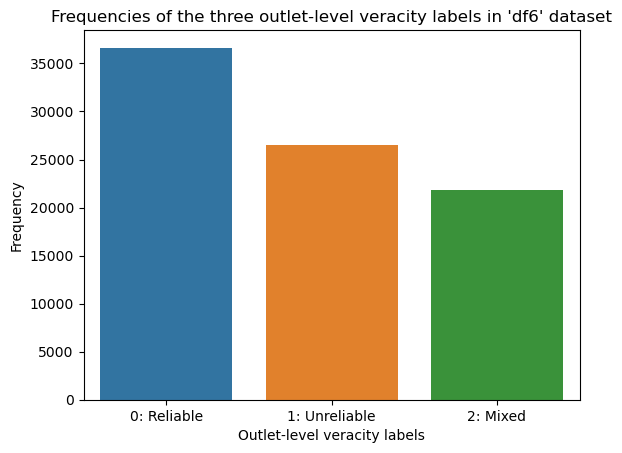

In [61]:
# barplot of labels
sns.countplot(x = "label", data = df6)
plt.xticks(np.arange(3),["0: Reliable", "1: Unreliable", "2: Mixed"])
plt.ylabel("Frequency")
plt.xlabel("Outlet-level veracity labels")
plt.title("Frequencies of the three outlet-level veracity labels in 'df6' dataset")
plt.show();



#########################
# PRE-PROCESSING FOR STAGE 2 and STAGE 3: 12% of original dataset
# creation of dataset: "strats12_all_cleaned.pkl"
#########################


# Create a stratified subset "strats12" dataframe being representative for the sources (12% of original database)


In [62]:
# Create stratified Sampling with around 200.000 entries (12% of database)

# Use groupby and apply to select sample 
# which maintains the population group ratios
strats12 = db.groupby('source').apply(
    lambda x: x.sample(frac=0.12, random_state=123)
)


In [63]:
# inspect strats12 dataframe

strats12.head()
# weird index!

id  \
source                                                                      
21stcenturywire 565171  21stcenturywire--2022-04-26--An Unsettling Rea...   
                565172  21stcenturywire--2022-04-24--Episode #416 – ‘S...   
                955703  21stcenturywire--2022-07-15--UKC News: UK Thou...   
                691952  21stcenturywire--2022-05-22--Twitter Audit Fin...   
                344762  21stcenturywire--2022-03-11--UKC News: The Tru...   

                              date           source  \
source                                                
21stcenturywire 565171  2022-04-26  21stcenturywire   
                565172  2022-04-24  21stcenturywire   
                955703  2022-07-15  21stcenturywire   
                691952  2022-05-22  21stcenturywire   
                344762  2022-03-11  21stcenturywire   

                                                                    title  \
source                                                                      
21stcenturywire 565171  An Unsettling Realization: ‘Mask Zealots are S...   
                565172  Episode #416 – ‘Soldiers of Fortune’ with gues...   
                955703  UKC News: UK Thought Police, France Stops Vacc...   
                691952  Twitter Audit Finds Half of President Biden’s ...   
                344762  UKC News: The Truth About US Bio Labs + White ...   

                                                                  content  \
source                                                                      
21stcenturywire 565171  It’s been noted how the fanatical nature of ma...   
                565172  Episode #416 of SUNDAY WIRE SHOW resumes this ...   
                955703  Authoritarians in the UK government are gettin...   
                691952  After the 2020 election, many Americans began ...   
                344762  The high stakes game surrounding the Ukraine c...   

                           author  \
source                              
21stcenturywire 565171  NEWS WIRE   
                565172  NEWS WIRE   
                955703  NEWS WIRE   
                691952  NEWS WIRE   
                344762  NEWS WIRE   

                                                                      url  \
source                                                                      
21stcenturywire 565171  https://21stcenturywire.com/2022/04/26/an-unse...   
                565172  https://21stcenturywire.com/2022/04/24/episode...   
                955703  https://21stcenturywire.com/2022/07/15/ukc-new...   
                691952  https://21stcenturywire.com/2022/05/22/twitter...   
                344762  https://21stcenturywire.com/2022/03/11/ukc-new...   

                                              published  published_utc  \
source                                                                   
21stcenturywire 565171  Tue, 26 Apr 2022 10:31:24 +0000     1650983484   
                565172  Sun, 24 Apr 2022 14:00:48 +0000     1650823248   
                955703  Fri, 15 Jul 2022 16:26:25 +0000     1657916785   
                691952  Sun, 22 May 2022 12:17:48 +0000     1653236268   
                344762  Fri, 11 Mar 2022 19:18:16 +0000     1647044296   

                        collection_utc  
source                                  
21stcenturywire 565171      1651010407  
                565172      1651010408  
                955703      1657922407  
                691952      1653256808  
                344762      1647039605

In [64]:
# Remove the extra index added by groupby()
### ONLY RUN ONCE OTHERWISE INDEX MIGHT BE DELETED
# strats12 = strats12.droplevel(0)


In [65]:
# check whether it worked
display(strats12.head())


,id,date,source,title,content,author,url,published,published_utc,collection_utc
565171,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407
565172,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408
955703,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407
691952,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808
344762,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605


In [66]:
# inspect the columns of the strats12 dataframe
display(strats12.info())
# 213.393 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213393 entries, 565171 to 1653410
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              213393 non-null  object
 1   date            213393 non-null  object
 2   source          213393 non-null  object
 3   title           213393 non-null  object
 4   content         213393 non-null  object
 5   author          213393 non-null  object
 6   url             213393 non-null  object
 7   published       213393 non-null  object
 8   published_utc   213393 non-null  int64 
 9   collection_utc  213393 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 17.9+ MB


None

In [67]:
# compare ratio of sources from db with strats6

# Ratio of selected items by the source
stratified_ratio12 = strats12['source'].value_counts(normalize=True)
# Convert to percentage
stratified_ratio12 = stratified_ratio12.round(4)*100
# We did stratified sampling. So give it proper name
stratified_ratio12.name = 'Stratified12'


In [68]:
# Add it to the variable source_ratios which already has 
# the  expected and SRS proportions 
source_ratios12 = pd.concat([source_ratios, stratified_ratio12], axis=1)
source_ratios12

# ratios --> are super similar

,Expected,Stratified6,Stratified12
thesun,3.998565,4.00,4.00
theindependent,3.728260,3.73,3.73
usnews,3.705936,3.71,3.71
eveningstandard,3.352128,3.35,3.35
theguardianuk,2.880121,2.88,2.88
...,...,...,...
urbanintellectuals,0.000056,NaN,NaN
whatfinger,0.000056,NaN,NaN
themillenniumreport,0.000056,NaN,NaN
learntheriskorg,0.000056,NaN,NaN


 # MERGE stratified subset "strats12" with "labels_all_2022": create final dataframe "strats12_all" for stage 2 and 3 of modeling

In [69]:
# do the merging
strats12_all = strats12.merge(right=labels_all_2022, on="source", how="left")
target = strats12_all["label"]

In [70]:
# inspect the dataframe
strats12_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213393 entries, 0 to 213392
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        213393 non-null  object 
 1   date                      213393 non-null  object 
 2   source                    213393 non-null  object 
 3   title                     213393 non-null  object 
 4   content                   213393 non-null  object 
 5   author                    213393 non-null  object 
 6   url                       213393 non-null  object 
 7   published                 213393 non-null  object 
 8   published_utc             213393 non-null  int64  
 9   collection_utc            213393 non-null  int64  
 10  country                   170099 non-null  object 
 11  label                     170099 non-null  float64
 12  bias                      170099 non-null  object 
 13  factuality                170099 non-null  f

In [71]:
# inspect the dataframe
strats12_all.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,country,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,USA,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0


## Preprocessing of "strats12_all" dataframe


In [72]:
# check for missing values
strats12_all.isnull().sum(axis = 0)
# NaN - probably articles in db without labels in labels_all_2022

id                              0
date                            0
source                          0
title                           0
content                         0
author                          0
url                             0
published                       0
published_utc                   0
collection_utc                  0
country                     43294
label                       43294
bias                        43294
factuality                  43294
questionable-source         43294
conspiracy-pseudoscience    43294
pro-science                 43294
dtype: int64

In [73]:
# missing values?
print(strats12_all[strats12_all["country"].isna()])
print("\n")

print(strats12_all["country"].isnull().sum(axis = 0))
# missing country for 43294 rows

                                                       id        date  \
1714    adobochronicles--2022-05-14--Adobo Chronicles’...  2022-05-14   
1715    adobochronicles--2022-05-05--Leni Robredo’s La...  2022-05-05   
1716    adobochronicles--2022-03-01--A Rare Footage Of...  2022-03-01   
1717    adobochronicles--2022-11-06--Twitter Blue Tick...  2022-11-06   
1718    adobochronicles--2022-03-10--Under A Robredo P...  2022-03-10   
...                                                   ...         ...   
211573  yna--2022-03-27--S. Korea, Arab nations to res...  2022-03-27   
211574  yna--2022-07-09--(2nd LD) S. Korea's new COVID...  2022-07-09   
211575  yna--2022-05-26--'The Roundup' becomes most-wa...  2022-05-26   
211576  yna--2022-11-05--U.S. urges UNSC action to pun...  2022-11-05   
211577  yna--2022-11-14--(EDITORIAL from Korea JoongAn...  2022-11-14   

                 source                                              title  \
1714    adobochronicles      Adobo Chronicles

In [74]:
### DELETE NaN in country (delete 43294 rows)
strats12_all = strats12_all.dropna(subset=['country'], how = "any")

strats12_all.info()
# strats12_all:    213393  
# new: 170099 
# deleted: 43294 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170099 entries, 0 to 213392
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        170099 non-null  object 
 1   date                      170099 non-null  object 
 2   source                    170099 non-null  object 
 3   title                     170099 non-null  object 
 4   content                   170099 non-null  object 
 5   author                    170099 non-null  object 
 6   url                       170099 non-null  object 
 7   published                 170099 non-null  object 
 8   published_utc             170099 non-null  int64  
 9   collection_utc            170099 non-null  int64  
 10  country                   170099 non-null  object 
 11  label                     170099 non-null  float64
 12  bias                      170099 non-null  object 
 13  factuality                170099 non-null  f

In [75]:
# check for missing values again
strats12_all.isnull().sum(axis = 0)


id                          0
date                        0
source                      0
title                       0
content                     0
author                      0
url                         0
published                   0
published_utc               0
collection_utc              0
country                     0
label                       0
bias                        0
factuality                  0
questionable-source         0
conspiracy-pseudoscience    0
pro-science                 0
dtype: int64

In [77]:
### DELETE UNNECESSARY COLUMNS
# date
# author
# published
# collection_utc
# bias
# country

columns_to_drop = ['date', 'author', 'published', 'collection_utc', 'bias', 'country']
strats12_all_short = strats12_all.drop(columns=columns_to_drop)


In [78]:
strats12_all_short.head(3)

,id,source,title,content,url,published_utc,label,factuality,questionable-source,conspiracy-pseudoscience,pro-science
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,1.0,2.0,0.0,1.0,0.0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,1.0,2.0,0.0,1.0,0.0
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,https://21stcenturywire.com/2022/07/15/ukc-new...,1657916785,1.0,2.0,0.0,1.0,0.0


In [79]:
strats12_all_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170099 entries, 0 to 213392
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        170099 non-null  object 
 1   source                    170099 non-null  object 
 2   title                     170099 non-null  object 
 3   content                   170099 non-null  object 
 4   url                       170099 non-null  object 
 5   published_utc             170099 non-null  int64  
 6   label                     170099 non-null  float64
 7   factuality                170099 non-null  float64
 8   questionable-source       170099 non-null  float64
 9   conspiracy-pseudoscience  170099 non-null  float64
 10  pro-science               170099 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 15.6+ MB


## Save and retrieve Pre-Processed Dataset as "strats12_all_cleaned.pkl"

In [80]:
strats12_all_short.to_pickle("strats12_all_cleaned.pkl")


In [81]:
df12 = pd.read_pickle("strats12_all_cleaned.pkl")

In [82]:
df12.head(2)

,id,source,title,content,url,published_utc,label,factuality,questionable-source,conspiracy-pseudoscience,pro-science
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,1.0,2.0,0.0,1.0,0.0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,1.0,2.0,0.0,1.0,0.0


In [83]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170099 entries, 0 to 213392
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        170099 non-null  object 
 1   source                    170099 non-null  object 
 2   title                     170099 non-null  object 
 3   content                   170099 non-null  object 
 4   url                       170099 non-null  object 
 5   published_utc             170099 non-null  int64  
 6   label                     170099 non-null  float64
 7   factuality                170099 non-null  float64
 8   questionable-source       170099 non-null  float64
 9   conspiracy-pseudoscience  170099 non-null  float64
 10  pro-science               170099 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 15.6+ MB
